# 📏 Spectrum Measures

:::{note}
This example shows the interactive capabilities of Matplotlib backends, and this will not appear in the static documentation. Please run this code on your machine to see the interactivity.
:::

In this tutorial you will learn how to measure data from spectrums. Although there are many tools to get spectrum measure we are interested in select data from spectrum. Since we are interested into analyze birdsongs, we want to measure the maximum and mimum frequency of the theme and trill, number of trills, trill rate, trill and theme length, etc.

::::{admonition} Google Colab Execution
:class: dropdown

If you are using Google Colabinstall the pacakge via pypi with the following code:

:::{code} bash
! git clone https://github.com/wavesongs/wavesongs
! pip install wavesongs
# enable hird party widgets (ipympl)
from google.colab import output
output.enable_custom_widget_manager()
:::

In addition, you have to change the results and audio folder to:
:::{code} python
audios = "/content/wavesongs/assets/audio"
results = "/content/wavesongs/assets/audio/results"
:::

This is because in Google Colab all is downloaded at the `contents` folder. 

:::{caution}
If you encounter an error message, reset the kernel and run the above cell again. After that, everything should work successfully. Ensure that the audios and results variables are correctly set to the appropriate paths in your environment.
:::

::::

## Libraries

Import the required classes and functions from `wavesongs`:

In [ ]:
%matplotlib ipympl

from wavesongs import plot
from wavesongs.objs.song import Song
from wavesongs.utils.paths import ProjDirs
from wavesongs.utils.tools import get_measures

## Project Directory

In [ ]:
audios = "./assets/audios"
results = "./assets/results"

proj_dirs = ProjDirs(audios=audios, results=results)

## Define Song

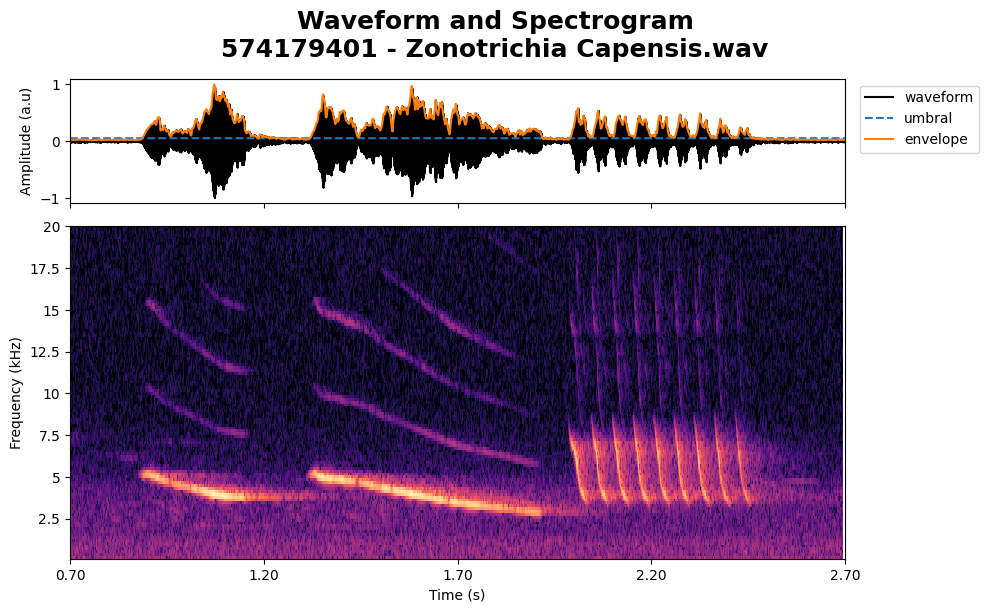

In [3]:
# Region of Interest
tlim_roi = (0.7, 2.7)

copeton_song = Song(proj_dirs, file_id="574179401", tlim=tlim_roi)
copeton_song.acoustical_features(umbral_FF=1.4, NN=256, ff_method="yin", flim=(1e2, 2e4))

plot.spectrogram_waveform(copeton_song, tlim=tlim_roi, save=False)

In [4]:
copeton_song.play()

After defining the syllable, you can select data from the spectrogram. Because we are interested in getting theme and trill characteristics, we defined the following default labels:

```python
labels = [
    r"$f_{max/min}$",  # Maximum and minimun frequencies of birdsongs, two points
    r"$theme_{ini}$",  # Theme syllable start, may be several points
    r"$theme_{end}$",  # Theme syllable end points
    r"$trill_{ini}$",  # Trill syllable start
    r"$trill_{end}$"   # Trill syllable end
]
colors = [
    "cyan", "olivedrab", "darkgreen", "steelblue", "royalblue"
]
markers = [
    "p", "*", "*", "o", "o"
]
```

As shown above, you can define the point color and marker type for each label. It is also possible to add more points by simply adding elements to the lists. Remember to use the same number of elements in each list to maintain consistency.

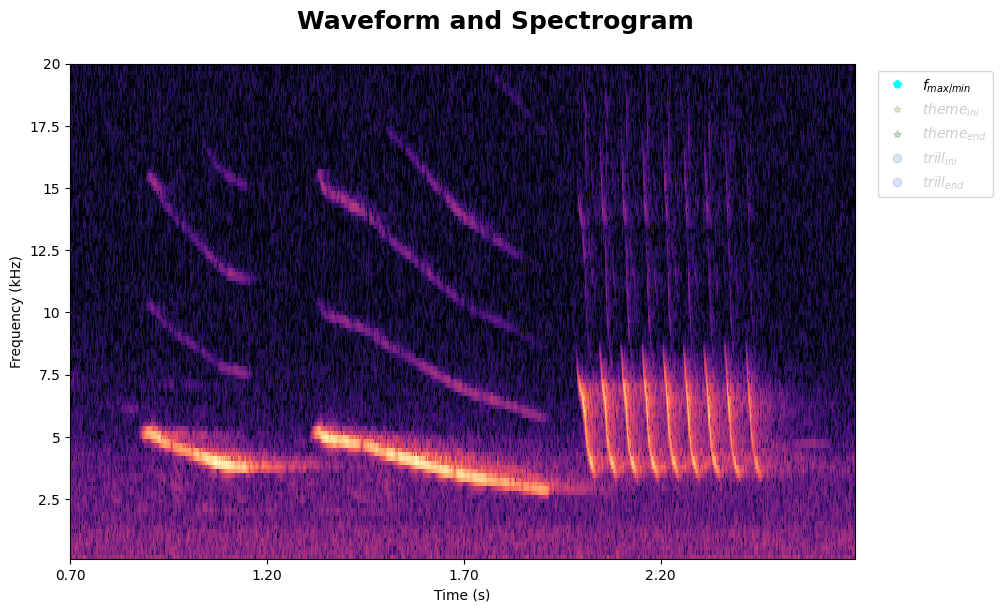

In [4]:
klicker_data = plot.spectrogram_data(copeton_song)

You will have a similar plot as below.  

:::{figure} ../../assets/img/MeasuresExample.png
:alt: measures_example
:width: 90%
:align: center
:name: fig_measures
Data measures example.
:::

To change the characteristic to measure, select the characteristic in the legend. The current characteristic selected will be highlighted while others are dimmed.

## Data Frame Measures

Finally, collect and export the measures in a DataFrame. As a good practice, put all measures in a single CSV file. This will make the analysis easier.

In [ ]:
df_measures = get_measures(klicker_data, copeton_song, save=False)
df_measures

,fmax,fmin,theme_trill_time_sep,trill_bw,trill_rates,trill_len_times,trill_len_freqs,trill_slopes,trill_tinis,trill_tends,...,theme_tinis,theme_tends,theme_types,themes_avg_len_time,themes_band_width,theme_sep_freq_means,theme_sep_time_means,theme_sep_freqs,theme_sep_times,no_themes
0,8847.391083,2511.227834,-0.471877,5677.202875,18.700922,"[np.float64(0.050308468411643714), np.float64(...","[np.float64(5523.764959048709), np.float64(562...","[np.float64(-109797.91540961032), np.float64(-...","[np.float64(1.9849188047711863), np.float64(2....","[np.float64(8661.690974019351), np.float64(877...",...,"[np.float64(0.8823403248272411), np.float64(1....","[np.float64(5470.989898989899), np.float64(558...","['down', 'down']",0.510553,2483.266605,2005.715335,0.011908,[np.float64(2005.7153351698807)],[np.float64(0.011907939580554583)],2
